In [ ]:
import pandas as pd
import numpy as np

In [ ]:
word =pd.read_csv("finalwords.csv")

In [ ]:
word.drop(columns = ["Unnamed: 0"],inplace=True)

In [ ]:
word.columns = ["words"]

In [ ]:
word

,words
0,people
1,cases
2,stay
3,coronavirus
4,covid_19
...,...
289,realdonaldtrumpin
290,stayhomeindia
291,stayhomesaveliveswhen
292,stayhomesavelivesmake


In [ ]:
words = word["words"].unique()

In [ ]:
words

array(['people', 'cases', 'stay', 'coronavirus', 'covid_19', 'deaths',
       'home', 'covid', 'stayathomeandstaysafedied', 'confirmed', 'safe',
       'death', 'borisjohnson', 'dying', 'healthy', 'coronaupdate',
       'toll', 'corona', 'die', 'number', 'latest',
       'lockdowneffecttested', 'reported', 'save', 'news', 'boris',
       'virus', 'positive', 'staying', 'authorities', 'covid2019', 'need',
       'tweets', 'coronavirustruthpositive', 'recovered', 'lives',
       'coronalockdownthink', 'nigeria', 'covid19pandemicvirus', 'april',
       'stayhomesavelivesmasks', 'socialdistancinginfected', 'today',
       'wash', 'canadian', 'hope', 'government', 'million', 'strong',
       'how', 'why', 'hands', 'spain', 'whencoronavirusisoverthere',
       'state', 'working', 'what', 'stayathome', 'discharged', 'outbreak',
       'recovery', 'stop', 'worldwide', 'inside', 'understand', 'update',
       'work', 'china', 'thelockdown', 'county', 'protect', 'nhs',
       'cancelstudentdebtk

In [ ]:
data= pd.read_csv("clean_df.csv")

In [ ]:
data.drop(columns = ["Unnamed: 0","lang","created_at","time"],inplace=True)

KeyError: ignored

In [ ]:
data

,text,created_at
0,corona update total effected recovered fatalit...,2020-03-25 06:02:50
1,anti corona t shirt collection is online for s...,2020-03-25 06:03:31
2,the matter is serious take full care not to be...,2020-03-25 06:03:39
3,all mosque committee members headed by syed ga...,2020-03-25 06:03:56
4,if these indians are already infected with cor...,2020-03-25 06:04:11
...,...,...
58486,aatmanirbharapnabharat facilitating states dur...,2020-05-23 17:09:28
58487,cheers to you jyoti wish you health happiness ...,2020-05-23 17:09:39
58488,aatmanirbharapnabharat technology driven educa...,2020-05-23 17:10:17
58489,eidmubarak eidalfitr romanreigns eid mubarak e...,2020-05-23 17:10:21


In [ ]:
data["topics"]=" "

In [ ]:
import nltk.data 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
for i in data.index:
    stri = data.at[i,"text"]
    l = word_tokenize(stri)
    for a in l:
        if a in words:
            data.at[i,"topics"] = data.at[i,"topics"] +"," + a
            

In [ ]:
data

,text,created_at,topics
0,corona update total effected recovered fatalit...,2020-03-25 06:02:50,",corona,update,total,recovered,global"
1,anti corona t shirt collection is online for s...,2020-03-25 06:03:31,",corona,covid"
2,the matter is serious take full care not to be...,2020-03-25 06:03:39,",care,corona"
3,all mosque committee members headed by syed ga...,2020-03-25 06:03:56,",lockdown,stay,pray,corona"
4,if these indians are already infected with cor...,2020-03-25 06:04:11,",corona,symptoms,govt,spread,virus,india"
...,...,...,...
58486,aatmanirbharapnabharat facilitating states dur...,2020-05-23 17:09:28,",states,covid,via,app"
58487,cheers to you jyoti wish you health happiness ...,2020-05-23 17:09:39,",health,who,leaders,would,help,real"
58488,aatmanirbharapnabharat technology driven educa...,2020-05-23 17:10:17,",covid,via,app"
58489,eidmubarak eidalfitr romanreigns eid mubarak e...,2020-05-23 17:10:21,",everyone,world,india,sad,corona,virus,world"


In [ ]:
for i in data.index:
    data.at[i,"topics"] = data.at[i,"topics"][2:]

In [ ]:
data

,text,created_at,topics
0,corona update total effected recovered fatalit...,2020-03-25 06:02:50,"corona,update,total,recovered,global"
1,anti corona t shirt collection is online for s...,2020-03-25 06:03:31,"corona,covid"
2,the matter is serious take full care not to be...,2020-03-25 06:03:39,"care,corona"
3,all mosque committee members headed by syed ga...,2020-03-25 06:03:56,"lockdown,stay,pray,corona"
4,if these indians are already infected with cor...,2020-03-25 06:04:11,"corona,symptoms,govt,spread,virus,india"
...,...,...,...
58486,aatmanirbharapnabharat facilitating states dur...,2020-05-23 17:09:28,"states,covid,via,app"
58487,cheers to you jyoti wish you health happiness ...,2020-05-23 17:09:39,"health,who,leaders,would,help,real"
58488,aatmanirbharapnabharat technology driven educa...,2020-05-23 17:10:17,"covid,via,app"
58489,eidmubarak eidalfitr romanreigns eid mubarak e...,2020-05-23 17:10:21,"everyone,world,india,sad,corona,virus,world"


In [ ]:

alltopics = ""

for i in data.index:
    alltopics = alltopics + str(data.at[i,"topics"])

In [ ]:
all_topics = alltopics.split(",")

In [ ]:
all_topics

In [ ]:
import collections

counts_no_urls = collections.Counter(all_topics)

counts_no_urls.most_common(15)
len(counts_no_urls)

16477

In [ ]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),
                             columns=['words', 'count'])

In [ ]:
clean_tweets_no_urls.head()

,words,count
0,corona,15966
1,covid,11847
2,india,5144
3,virus,4873
4,people,4258


In [ ]:
clean_tweets_no_urls.to_csv("a.csv")

In [ ]:
term_freq_df = clean_tweets_no_urls

In [ ]:
term_freq_df.columns = ["words","total"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
term_freq_df.drop(columns=["words"],inplace=True)
plt.show()

<Figure size 720x576 with 0 Axes>

In [ ]:
#india = data[data["country_code"]=="IN"]

In [ ]:
india = data

In [ ]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58491 entries, 0 to 58490
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        58491 non-null  object
 1   created_at  58491 non-null  object
 2   topics      58491 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [ ]:
india

,text,created_at,topics
0,corona update total effected recovered fatalit...,2020-03-25 06:02:50,"corona,update,total,recovered,global"
1,anti corona t shirt collection is online for s...,2020-03-25 06:03:31,"corona,covid"
2,the matter is serious take full care not to be...,2020-03-25 06:03:39,"care,corona"
3,all mosque committee members headed by syed ga...,2020-03-25 06:03:56,"lockdown,stay,pray,corona"
4,if these indians are already infected with cor...,2020-03-25 06:04:11,"corona,symptoms,govt,spread,virus,india"
...,...,...,...
58486,aatmanirbharapnabharat facilitating states dur...,2020-05-23 17:09:28,"states,covid,via,app"
58487,cheers to you jyoti wish you health happiness ...,2020-05-23 17:09:39,"health,who,leaders,would,help,real"
58488,aatmanirbharapnabharat technology driven educa...,2020-05-23 17:10:17,"covid,via,app"
58489,eidmubarak eidalfitr romanreigns eid mubarak e...,2020-05-23 17:10:21,"everyone,world,india,sad,corona,virus,world"


In [ ]:
india["date"] = ""

In [ ]:
from datetime import datetime

for i in india.index:
  india.at[i,"date"] = str(india.at[i,"created_at"]).split(' ')[0]

In [ ]:
india = india.drop(columns=["created_at"])

In [ ]:
india

,text,topics,date
0,corona update total effected recovered fatalit...,"corona,update,total,recovered,global",2020-03-25
1,anti corona t shirt collection is online for s...,"corona,covid",2020-03-25
2,the matter is serious take full care not to be...,"care,corona",2020-03-25
3,all mosque committee members headed by syed ga...,"lockdown,stay,pray,corona",2020-03-25
4,if these indians are already infected with cor...,"corona,symptoms,govt,spread,virus,india",2020-03-25
...,...,...,...
58486,aatmanirbharapnabharat facilitating states dur...,"states,covid,via,app",2020-05-23
58487,cheers to you jyoti wish you health happiness ...,"health,who,leaders,would,help,real",2020-05-23
58488,aatmanirbharapnabharat technology driven educa...,"covid,via,app",2020-05-23
58489,eidmubarak eidalfitr romanreigns eid mubarak e...,"everyone,world,india,sad,corona,virus,world",2020-05-23


In [ ]:
india["date"] = india["date"].astype('datetime64[ns]')

In [ ]:
la1 = '2020-03-25'
la2 = '2020-04-14'
lb1 = '2020-04-15'
lb2 = '2020-05-03'
lc1 = '2020-05-04'
lc2 = '2020-05-17'
ld1 = '2020-05-18'
ld2 = '2020-05-31'

a1 = datetime.strptime(la1, '%Y-%m-%d')
a2 = datetime.strptime(la2, '%Y-%m-%d')
b1 = datetime.strptime(lb1, '%Y-%m-%d')
b2 = datetime.strptime(lb2, '%Y-%m-%d')
c1 = datetime.strptime(lc1, '%Y-%m-%d')
c2 = datetime.strptime(lc2, '%Y-%m-%d')
d1 = datetime.strptime(ld1, '%Y-%m-%d')
d2 = datetime.strptime(ld2, '%Y-%m-%d')

In [ ]:
indialockdown1 = india[(india.date>=a1) & (india.date<=a2)]
indialockdown2 = india[(india.date>=b1) & (india.date<=b2)]
indialockdown3 = india[(india.date>=c1) & (india.date<=c2)]
indialockdown4 = india[(india.date>=d1) & (india.date<=d2)]

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    return [blob.sentiment.polarity, blob.sentiment.subjectivity]


indialockdown1.reset_index(inplace = True)
polarity,subjectivity = [], []
for i in range(len(indialockdown1)):
    pol , sub = get_sentiment(indialockdown1['text'][i])
    polarity.append(pol)
    subjectivity.append(sub)
    
indialockdown1['polarity'] = polarity
indialockdown1['subjectivity'] = subjectivity


indialockdown2.reset_index(inplace = True)
polarity,subjectivity = [], []
for i in range(len(indialockdown2)):
    pol , sub = get_sentiment(indialockdown2['text'][i])
    polarity.append(pol)
    subjectivity.append(sub)

indialockdown2['polarity'] = polarity
indialockdown2['subjectivity'] = subjectivity

indialockdown3.reset_index(inplace = True)
polarity,subjectivity = [], []
for i in range(len(indialockdown3)):
    pol , sub = get_sentiment(indialockdown3['text'][i])
    polarity.append(pol)
    subjectivity.append(sub)


indialockdown3['polarity'] = polarity
indialockdown3['subjectivity'] = subjectivity

indialockdown4.reset_index(inplace = True)
polarity,subjectivity = [], []
for i in range(len(indialockdown4)):
    pol , sub = get_sentiment(indialockdown4['text'][i])
    polarity.append(pol)
    subjectivity.append(sub)


indialockdown4['polarity'] = polarity
indialockdown4['subjectivity'] = subjectivity


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
indialockdown1.head()

,index,text,topics,date,polarity,subjectivity
0,0,corona update total effected recovered fatalit...,"corona,update,total,recovered,global",2020-03-25,0.000000,0.375000
1,1,anti corona t shirt collection is online for s...,"corona,covid",2020-03-25,0.000000,0.000000
2,2,the matter is serious take full care not to be...,"care,corona",2020-03-25,0.008333,0.608333
3,3,all mosque committee members headed by syed ga...,"lockdown,stay,pray,corona",2020-03-25,-0.100000,0.100000
4,4,if these indians are already infected with cor...,"corona,symptoms,govt,spread,virus,india",2020-03-25,0.000000,0.250000


In [ ]:
poscount1 = 0
negcount1 = 0
neutcount1 = 0
poscount2 = 0
negcount2 = 0
neutcount2 = 0
poscount3 = 0
negcount3 = 0
neutcount3 = 0
poscount4 = 0
negcount4 = 0
neutcount4 = 0


for i in indialockdown1.index:
  if (indialockdown1.at[i,"polarity"]>0):
    poscount1 = poscount1 + 1
  elif (indialockdown1.at[i,"polarity"]==0):
    neutcount1 = neutcount1 + 1
  else:
    negcount1 = negcount1 + 1


for i in indialockdown2.index:
  if (indialockdown2.at[i,"polarity"]>0):
    poscount2 = poscount2 + 1
  elif (indialockdown2.at[i,"polarity"]==0):
    neutcount2 = neutcount2 + 1
  else:
    negcount2 = negcount2 + 1

for i in indialockdown3.index:
  if (indialockdown3.at[i,"polarity"]>0):
    poscount3 = poscount3 + 1
  elif (indialockdown3.at[i,"polarity"]==0):
    neutcount3 = neutcount3 + 1
  else:
    negcount3 = negcount3 + 1

for i in indialockdown4.index:
  if(indialockdown4.at[i,"polarity"]>0):
    poscount4 = poscount4 + 1
  elif (indialockdown4.at[i,"polarity"]==0):
    neutcount4 = neutcount4 + 1
  else:
    negcount4 = negcount4 + 1

In [ ]:
draw = pd.DataFrame(columns=["Lockdown","Positive","Negative","Neutral"])
draw = draw.append({'Lockdown': "Lockdown 1", 'Positive': poscount1, 'Negative': negcount1, 'Neutral': neutcount1}, ignore_index=True)
draw = draw.append({'Lockdown': "Lockdown 2",'Positive': poscount2, 'Negative': negcount2, 'Neutral': neutcount2}, ignore_index=True)
draw = draw.append({'Lockdown': "Lockdown 3",'Positive': poscount3, 'Negative': negcount3, 'Neutral': neutcount3}, ignore_index=True)
draw = draw.append({'Lockdown': "Lockdown 4",'Positive': poscount4, 'Negative': negcount4, 'Neutral': neutcount4}, ignore_index=True)

In [ ]:
draw

,Lockdown,Positive,Negative,Neutral
0,Lockdown 1,9482,4500,6392
1,Lockdown 2,8729,3440,5530
2,Lockdown 3,2964,1246,1940
3,Lockdown 4,7112,2853,4303


In [ ]:
draw.sum(axis=0) 

Lockdown    Lockdown 1Lockdown 2Lockdown 3Lockdown 4
Positive                                       28287
Negative                                       12039
Neutral                                        18165
dtype: object

In [ ]:
indialockdown1['sentiment'] = ""
for i in indialockdown1.index:
  if (indialockdown1.at[i,"polarity"]>0):
    indialockdown1.at[i,'sentiment']= 'Positive'
  elif (indialockdown1.at[i,"polarity"]==0):
    indialockdown1.at[i,'sentiment']= 'Neutral'
  else:
    indialockdown1.at[i,'sentiment']= 'Negative'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
indialockdown2['sentiment'] = ""
for i in indialockdown2.index:
  if (indialockdown2.at[i,"polarity"]>0):
    indialockdown2.at[i,'sentiment']= 'Positive'
  elif (indialockdown2.at[i,"polarity"]==0):
    indialockdown2.at[i,'sentiment']= 'Neutral'
  else:
    indialockdown2.at[i,'sentiment']= 'Negative'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
indialockdown3['sentiment'] = ""
for i in indialockdown3.index:
  if (indialockdown3.at[i,"polarity"]>0):
    indialockdown3.at[i,'sentiment']= 'Positive'
  elif (indialockdown3.at[i,"polarity"]==0):
    indialockdown3.at[i,'sentiment']= 'Neutral'
  else:
    indialockdown3.at[i,'sentiment']= 'Negative'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
indialockdown4['sentiment'] = ""
for i in indialockdown4.index:
  if (indialockdown4.at[i,"polarity"]>0):
    indialockdown4.at[i,'sentiment']= 'Positive'
  elif (indialockdown4.at[i,"polarity"]==0):
    indialockdown4.at[i,'sentiment']= 'Neutral'
  else:
    indialockdown4.at[i,'sentiment']= 'Negative'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re


In [ ]:
df1 = indialockdown1[['text','sentiment']]
df1.columns = ['statement','sentiment']

df2 = indialockdown2[['text','sentiment']]
df2.columns = ['statement','sentiment']

df3 = indialockdown3[['text','sentiment']]
df3.columns = ['statement','sentiment']

df4 = indialockdown4[['text','sentiment']]
df4.columns = ['statement','sentiment']

In [ ]:
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)
df

,statement,sentiment
0,corona update total effected recovered fatalit...,Neutral
1,anti corona t shirt collection is online for s...,Neutral
2,the matter is serious take full care not to be...,Positive
3,all mosque committee members headed by syed ga...,Negative
4,if these indians are already infected with cor...,Neutral
...,...,...
14263,aatmanirbharapnabharat facilitating states dur...,Neutral
14264,cheers to you jyoti wish you health happiness ...,Positive
14265,aatmanirbharapnabharat technology driven educa...,Neutral
14266,eidmubarak eidalfitr romanreigns eid mubarak e...,Negative


In [ ]:
train,eva = train_test_split(df,test_size = 0.2)

In [ ]:
!pip install simpletransformers


In [ ]:
!pip install simpletransformers[classification]

In [ ]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
# Create a TransformerModel
model = ClassificationModel('roberta', 'roberta-base', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [ ]:
def making_label(st):
    if(st=='Positive'):
        return 0
    elif(st=='Neutral'):
        return 2
    else:
        return 1
    
train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(46792, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [ ]:
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1500 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 1.0048085359182763)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
result

{'eval_loss': 0.8707465839385986, 'mcc': 0.375596098900267}

In [ ]:
model_outputs

array([[ 0.61977553,  0.44902292, -0.90085047],
       [ 0.64759207, -0.93842554,  0.44740051],
       [ 0.3215186 , -0.99738109,  0.94640166],
       ...,
       [ 0.84211397, -0.04078467, -0.58108532],
       [ 0.76904523,  0.61685264, -1.17630851],
       [ 0.23999476, -1.0979799 ,  1.04708052]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[150,  12,  18],
       [ 53,  23,  15],
       [ 56,   2,  71]])

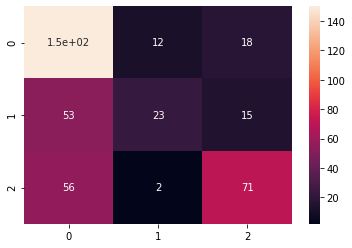

In [ ]:
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()


In [ ]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.58      0.83      0.68       180
     neutral       0.62      0.25      0.36        91
    negative       0.68      0.55      0.61       129

    accuracy                           0.61       400
   macro avg       0.63      0.55      0.55       400
weighted avg       0.62      0.61      0.59       400



In [ ]:
sklearn.metrics.accuracy_score(true,predicted)

0.7025

In [ ]:
indialockdown1.head()

,index,text,topics,date,polarity,subjectivity,sentiment
0,0,corona update total effected recovered fatalit...,"corona,update,total,recovered,global",2020-03-25,0.000000,0.375000,Neutral
1,1,anti corona t shirt collection is online for s...,"corona,covid",2020-03-25,0.000000,0.000000,Neutral
2,2,the matter is serious take full care not to be...,"care,corona",2020-03-25,0.008333,0.608333,Positive
3,3,all mosque committee members headed by syed ga...,"lockdown,stay,pray,corona",2020-03-25,-0.100000,0.100000,Negative
4,4,if these indians are already infected with cor...,"corona,symptoms,govt,spread,virus,india",2020-03-25,0.000000,0.250000,Neutral


In [ ]:
indialockdown1.to_csv("a1.csv")
indialockdown2.to_csv("a2.csv")

In [ ]:
poscount1 = 0
negcount1 = 0
neutcount1 = 0
poscount2 = 0
negcount2 = 0
neutcount2 = 0
poscount3 = 0
negcount3 = 0
neutcount3 = 0
poscount4 = 0
negcount4 = 0
neutcount4 = 0


for i in indialockdown1.index:
  if (indialockdown1.at[i,"pred"]=="positive"):
    poscount1 = poscount1 + 1
  elif (indialockdown1.at[i,"pred"]=="neutral"):
    neutcount1 = neutcount1 + 1
  else:
    negcount1 = negcount1 + 1


for i in indialockdown2.index:
  if (indialockdown2.at[i,"pred"]=="positive"):
    poscount2 = poscount2 + 1
  elif (indialockdown2.at[i,"pred"]=="neutral"):
    neutcount2 = neutcount2 + 1
  else:
    negcount2 = negcount2 + 1


for i in indialockdown3.index:
  if (indialockdown3.at[i,"pred"]=="positive"):
    poscount3 = poscount3 + 1
  elif (indialockdown3.at[i,"pred"]=="neutral"):
    neutcount3 = neutcount3 + 1
  else:
    negcount3 = negcount3 + 1


for i in indialockdown4.index:
  if (indialockdown4.at[i,"pred"]=="positive"):
    poscount4 = poscount4 + 1
  elif (indialockdown4.at[i,"pred"]=="neutral"):
    neutcount4 = neutcount4 + 1
  else:
    negcount4 = negcount4 + 1



KeyError: ignored

In [ ]:
x = len(indialockdown1)
y = len(indialockdown2)


poscount1 = (poscount1/x) *100
negcount1 = (negcount1/x) *100

neutcount1 = (neutcount1/x) *100

poscount2= (poscount2/y) *100
negcount2= (negcount2/y) *100

neutcount2= (neutcount2/y) *100




In [ ]:
indialockdown1.head()

In [ ]:
indialockdown2.head()

In [ ]:
draw = pd.DataFrame(columns=["Lockdown","Positive","Negative","Neutral"])
draw = draw.append({'Lockdown': "Lockdown 1", 'Positive': poscount1, 'Negative': negcount1, 'Neutral': neutcount1}, ignore_index=True)
draw = draw.append({'Lockdown': "Lockdown 2",'Positive': poscount2, 'Negative': negcount2, 'Neutral': neutcount2}, ignore_index=True)
draw.head()

Text(0, 0.5, 'Number of Tweets')

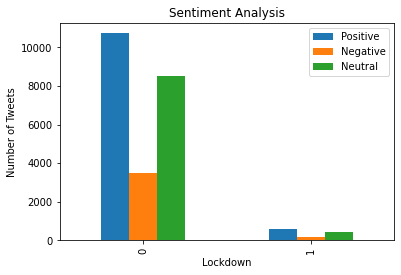

In [ ]:
draw.plot(kind="bar")
plt.title("Sentiment Analysis")
plt.xlabel("Lockdown")
plt.ylabel("Number of Tweets")

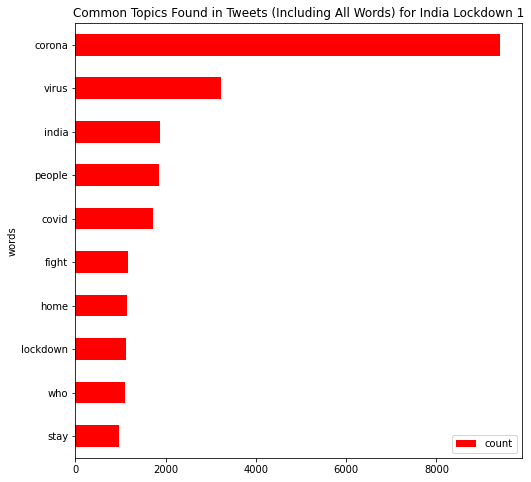

In [ ]:
lockdown1 = ""

for i in indialockdown1.index:
    lockdown1 = lockdown1 + str(indialockdown1.at[i,"topics"])
    
all_topicslockdown1 = lockdown1.split(",")
counts_no_urls = collections.Counter(all_topicslockdown1)

counts_no_urls.most_common(15)
len(counts_no_urls)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Topics Found in Tweets (Including All Words) for India Lockdown 1")

plt.show()

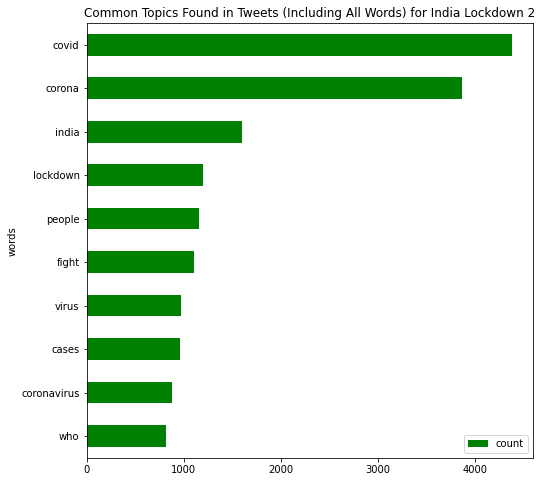

In [ ]:
lockdown2 = ""

for i in indialockdown2.index:
    lockdown2 = lockdown2 + str(indialockdown2.at[i,"topics"])
    
all_topicslockdown2 = lockdown2.split(",")
counts_no_urls = collections.Counter(all_topicslockdown2)

counts_no_urls.most_common(15)
len(counts_no_urls)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Topics Found in Tweets (Including All Words) for India Lockdown 2")

plt.show()

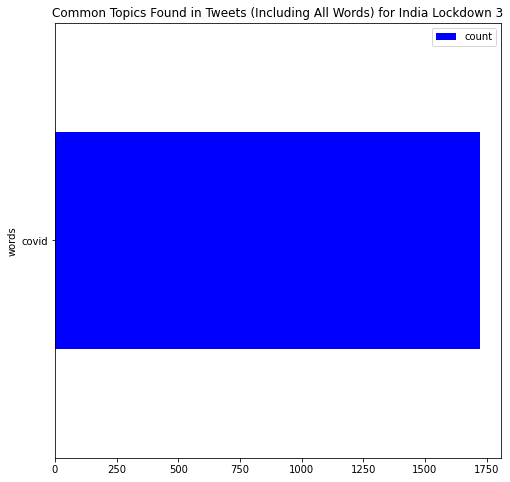

In [ ]:
lockdown3 = ""

for i in indialockdown3.index:
    lockdown3 = lockdown3 + str(indialockdown3.at[i,"topics"])
    
all_topicslockdown3 = lockdown3.split(",")
counts_no_urls = collections.Counter(all_topicslockdown3)



clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(1),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Topics Found in Tweets (Including All Words) for India Lockdown 3")

plt.show()

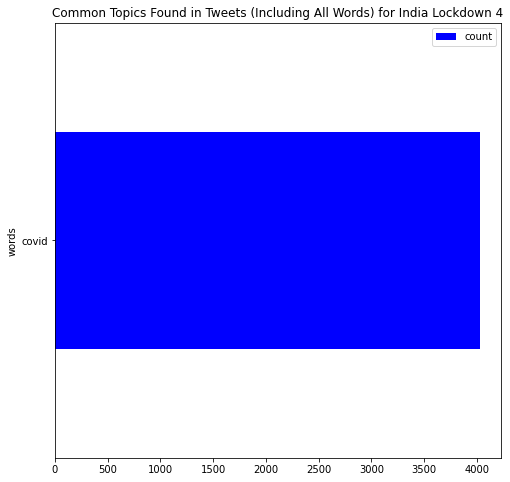

In [ ]:
lockdown4 = ""

for i in indialockdown4.index:
    lockdown4 = lockdown4 + str(indialockdown4.at[i,"topics"])
    
all_topicslockdown4 = lockdown4.split(",")
counts_no_urls = collections.Counter(all_topicslockdown4)



clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(1),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Topics Found in Tweets (Including All Words) for India Lockdown 4")

plt.show()

In [ ]:
indialockdown4

,index,text,topics,date,polarity,subjectivity,sentiment
0,44223,next pm kaun only,"next,pm",2020-05-18,0.000000,0.500000,Neutral
1,44224,while numbers are scary the fact that mumbai i...,"million,test,india,million,best",2020-05-18,0.116667,0.566667,Positive
2,44225,a men has been transferred to show best perfor...,"best,corona",2020-05-18,0.500000,0.650000,Positive
3,44226,gadkari jaipur jail became rd largest jail hot...,"country,health,stop,need,social,distancing",2020-05-18,-0.059524,0.070238,Negative
4,44227,the older people who are innocent and still ke...,"people,who,govt,people,risk,corona",2020-05-18,0.137778,0.295556,Positive
...,...,...,...,...,...,...,...
14263,58486,aatmanirbharapnabharat facilitating states dur...,"states,covid,via,app",2020-05-23,0.000000,0.000000,Neutral
14264,58487,cheers to you jyoti wish you health happiness ...,"health,who,leaders,would,help,real",2020-05-23,0.450000,0.250000,Positive
14265,58488,aatmanirbharapnabharat technology driven educa...,"covid,via,app",2020-05-23,0.000000,0.000000,Neutral
14266,58489,eidmubarak eidalfitr romanreigns eid mubarak e...,"everyone,world,india,sad,corona,virus,world",2020-05-23,-0.500000,1.000000,Negative


In [ ]:
indialockdown3

,index,text,topics,date,polarity,subjectivity,sentiment
0,38073,india completes million covid tests what is re...,"india,million,covid,what,via",2020-05-04,0.750000,0.750000,Positive
1,38074,in the pandemic situation all over world east ...,"pandemic,world,provide,essential,people,covid,...",2020-05-04,0.140000,0.305000,Positive
2,38075,fair enough but for that matter you need manpo...,"need,save,lives,economy,must,corona,virus,amer...",2020-05-04,0.216667,0.616667,Positive
3,38076,good mem,good,2020-05-04,0.700000,0.600000,Positive
4,38077,sir today graph of corona infected person will...,"today,corona",2020-05-04,-0.200000,0.000000,Negative
...,...,...,...,...,...,...,...
6145,44218,covid update total case cured deaths new cases...,"covid,update,total,deaths,new,cases,deaths,rep...",2020-05-07,0.045455,0.423737,Positive
6146,44219,indiafightscorona drdo develops uv disinfectan...,"fight,covid,via,app",2020-05-07,0.000000,0.000000,Neutral
6147,44220,no surprises,,2020-05-07,0.000000,0.000000,Neutral
6148,44221,coronavirus lockdown industries hit hard in su...,"coronavirus,lockdown,news,times,india",2020-05-07,-0.291667,0.541667,Negative


In [ ]:
indialockdown4

,index,text,topics,date,polarity,subjectivity,sentiment
0,44223,next pm kaun only,"next,pm",2020-05-18,0.000000,0.500000,Neutral
1,44224,while numbers are scary the fact that mumbai i...,"million,test,india,million,best",2020-05-18,0.116667,0.566667,Positive
2,44225,a men has been transferred to show best perfor...,"best,corona",2020-05-18,0.500000,0.650000,Positive
3,44226,gadkari jaipur jail became rd largest jail hot...,"country,health,stop,need,social,distancing",2020-05-18,-0.059524,0.070238,Negative
4,44227,the older people who are innocent and still ke...,"people,who,govt,people,risk,corona",2020-05-18,0.137778,0.295556,Positive
...,...,...,...,...,...,...,...
14263,58486,aatmanirbharapnabharat facilitating states dur...,"states,covid,via,app",2020-05-23,0.000000,0.000000,Neutral
14264,58487,cheers to you jyoti wish you health happiness ...,"health,who,leaders,would,help,real",2020-05-23,0.450000,0.250000,Positive
14265,58488,aatmanirbharapnabharat technology driven educa...,"covid,via,app",2020-05-23,0.000000,0.000000,Neutral
14266,58489,eidmubarak eidalfitr romanreigns eid mubarak e...,"everyone,world,india,sad,corona,virus,world",2020-05-23,-0.500000,1.000000,Negative


In [ ]:
usa = data[data["country_code"]=="US"]
usa

,Unnamed: 0,text,country_code,date,hashtag,topics
0,0,claytravis flu this seems fishy covid_19 numbe...,US,2020-03-29,['#Covid_19'],covid_19
1,1,netflix omg ozark ending die thanks distractio...,US,2020-03-29,['#COVID19'],die
2,2,i n't think gd leadership across states i see ...,US,2020-03-29,['#COVID19'],"states,long,people,dying,test"
4,4,any hospital our engineering department helped...,US,2020-03-29,"['#Covid_19', '#medtwitter']","hospital,covid_19"
7,7,... we best make smile terotheotter pics keep ...,US,2020-03-29,"['#terotheotter', '#covid_19', '#lifeakua']","best,make,healthy,today,covid_19"
...,...,...,...,...,...,...
230762,230762,this lot fun good way spend day stuck inside m...,US,2020-04-15,"['#covi', '#sixfanarts', '#sixfanartschallenge...","good,inside,week"
230763,230763,cnn publishes communist chinese propaganda cla...,US,2020-04-15,['#COVID19'],"cnn,chinese,china"
230765,230765,ceo_clemetparks sir some positive offshoots co...,US,2020-04-15,"['#COVID19', '#everyproblemisanopportunity']","positive,life,would"
230767,230767,remember soviet union told world advanced nucl...,US,2020-04-15,['#COVID19'],"world,china,who,help"


In [ ]:
india = usa

In [ ]:
from datetime import datetime

for i in india.index:
    india.at[i,"date"] = datetime.strptime(india.at[i,"date"], '%Y-%m-%d')

indialockdown1 = india[(india.date>=a1) & (india.date<=a2)]
indialockdown2 = india[(india.date>=b1) & (india.date<=b2)]
indialockdown3 = india[(india.date>=c1) & (india.date<=c2)]
indialockdown4 = india[(india.date>=d1) & (india.date<=d2)]

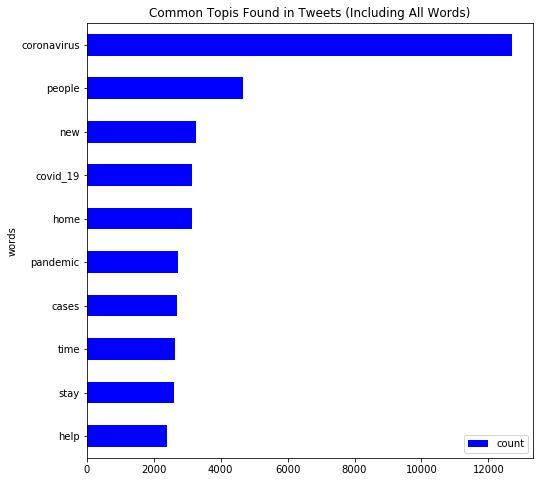

In [ ]:
lockdown1 = ""

for i in indialockdown1.index:
    lockdown1 = lockdown1 + str(indialockdown1.at[i,"topics"])
    
all_topicslockdown1 = lockdown1.split(",")
counts_no_urls = collections.Counter(all_topicslockdown1)

counts_no_urls.most_common(15)
len(counts_no_urls)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Common Topis Found in Tweets (Including All Words)")

plt.show()

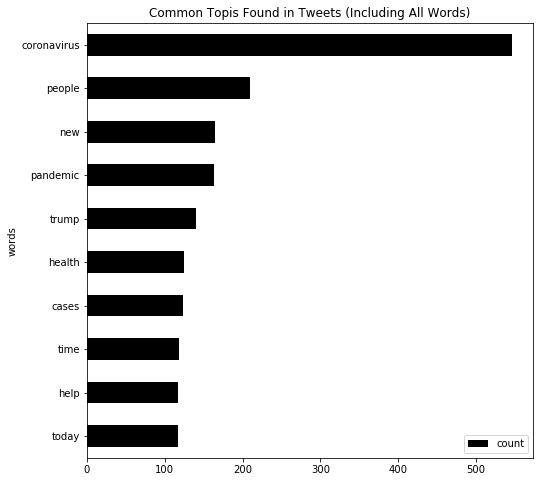

In [ ]:
lockdown2 = ""

for i in indialockdown2.index:
    lockdown2 = lockdown2 + str(indialockdown2.at[i,"topics"])
    
all_topicslockdown2 = lockdown2.split(",")
counts_no_urls = collections.Counter(all_topicslockdown2)

counts_no_urls.most_common(15)
len(counts_no_urls)

clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(10),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="black")

ax.set_title("Common Topis Found in Tweets (Including All Words)")

plt.show()

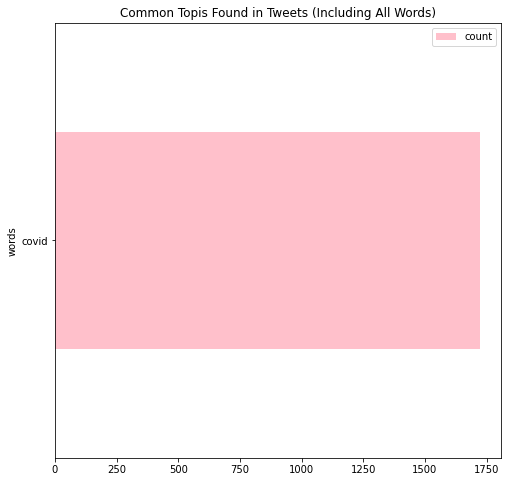

In [ ]:
lockdown3 = ""

for i in indialockdown3.index:
    lockdown3 = lockdown3 + str(indialockdown3.at[i,"topics"])
    
all_topicslockdown3 = lockdown3.split(",")
counts_no_urls = collections.Counter(all_topicslockdown3)



clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(1),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="pink")

ax.set_title("Common Topis Found in Tweets (Including All Words)")

plt.show()

In [ ]:
data["country_code"].unique()

array(['US', 'GB', 'JP', 'CA', 'IE', 'QA', 'AU', 'NG', 'FJ', 'FR', 'HK',
       'IN', 'VC', 'NZ', 'PK', 'PH', 'SV', 'BR', 'CO', 'CH', 'SA', 'MA',
       'MY', 'SG', 'MX', 'UY', 'KE', 'WS', 'CN', 'SK', 'CM', 'ZA', 'BM',
       'MV', 'ES', 'ID', 'TM', 'PT', 'TH', 'KR', 'FI', 'TR', 'AE', 'BD',
       'RW', 'DZ', 'IT', 'GH', 'ZW', 'JM', 'LK', 'TT', 'GM', 'NP', 'AR',
       'OM', 'AT', 'VN', 'UG', 'BT', 'NL', 'LB', 'SC', 'EG', 'AF', 'GT',
       'VE', 'HT', 'SD', 'MM', 'DE', 'PL', 'GR', 'NO', 'TW', 'BE', 'UA',
       'RU', 'ZM', 'KZ', 'MW', 'LS', 'SI', 'RO', 'DK', 'MZ', 'CY', 'DO',
       'SE', 'NI', 'IL', 'SO', 'BW', 'TZ', 'EC', 'AO', 'ML', 'CZ', 'HR',
       'ET', 'KW', 'ME', 'AL', 'IQ', 'CI', 'DJ', 'LY', 'EE', 'BN', 'SY',
       'MT', 'CL', 'GE', 'SZ', 'SN', 'LR', 'JO', 'LU', 'BA', 'PG', 'BJ',
       'RS', 'IR', 'KH', 'AD', 'IM', 'CW', 'IS', 'HU', 'MK', 'NE', 'AM',
       'CD', 'MC', 'CG', 'SL', 'LT', 'VG', 'MN', 'MO', 'GI', 'BH', 'TN',
       'XK', 'BO', 'GN', 'AW', 'AG', 'AZ', 'BB', 'P

In [ ]:
import seaborn as sns

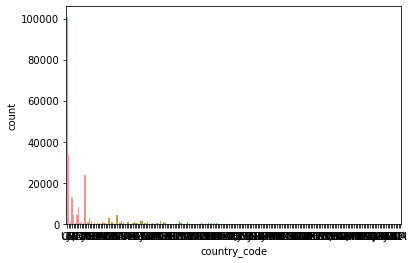

In [ ]:
sns.countplot(data['country_code'])

In [ ]:
df = data
freq_vals = df['country_code'].value_counts()[:].index.tolist()
freq_df = df[df['country_code'].isin(freq_vals)]


In [ ]:
count = df['country_code'].value_counts() 

In [ ]:
count

US    100872
GB     33574
IN     23949
CA     13033
NG      8225
       ...  
MF         1
PN         1
PF         1
GD         1
YE         1
Name: country_code, Length: 209, dtype: int64

In [ ]:
count.to_csv("a.csv")

,country,count
